In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV


# learners
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

# embeddings

# preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

# evaluation
from sklearn.metrics import classification_report, confusion_matrix

# pipeline
from sklearn.pipeline import Pipeline

## Question 1

- Create a dataframe by reading the file `eng.csv`. You can find the .csv file under "files" on Canvas. (We suggest you take a sample of the data, for example with 1,000, 10,000 or 20,000 instances, to save computing time.) 

- Use value_counts to see the counts for each value of the column, `emotion`. 

We will create models to predict emotions based on texts. Assign the `text` column to X and the `emotion` column to y.

In [25]:
df = pd.read_csv("data/eng.csv")
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282313 entries, 0 to 282312
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      282313 non-null  object
 1   emotion   282313 non-null  object
 2   language  282313 non-null  object
dtypes: object(3)
memory usage: 6.5+ MB


In [26]:
# Creating a dataframe with only 10,000 instances. Taking the top of the list
#df = df.iloc[:10000, :]
#df.info()

# Taking 10000 instances with the .sample method
#df = df.sample(10000)
#df.info()

# A random sample from the dataset. https://stackoverflow.com/questions/40986230/reduce-dataframe-size-in-pandas
df = df.sample(frac=0.1) # Get 10% of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28231 entries, 157783 to 208036
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      28231 non-null  object
 1   emotion   28231 non-null  object
 2   language  28231 non-null  object
dtypes: object(3)
memory usage: 882.2+ KB


In [27]:
#Assigning the text column to X and the emotions to y
X = df.text
y= df.emotion
X,y

(157783    [PERSON] un!!!Vmobile...team...blessings [PHOT...
 281283    Tickets can be purchased at www.azleway.org, T...
 222405    Regardless of race, regardless of age, regardl...
 252982            SARHARA SINGER, COMPOSER & SERVE THE LORD
 161925    :v Please, do a movie together...I beg both of...
                                 ...                        
 123616    Stunning weather in #Sydney today! Great way t...
 52117     [PHOTO] Launch of Responsible Recycling eWaste...
 221330    some of your cash and leave as you lay on the ...
 133590    other hostess benefits! I am so excited these ...
 208036                           HALAL [WITH] at [LOCATION]
 Name: text, Length: 28231, dtype: object,
 157783    anticipation
 281283    anticipation
 222405             joy
 252982             joy
 161925    anticipation
               ...     
 123616             joy
 52117              joy
 221330             joy
 133590    anticipation
 208036    anticipation
 Name: emotion, Length

## Question 2

- Perform a train test split and then fit_transform a `Countvectorizer` on X_train and transform X_test.

In [28]:
# Train test splittinge the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
# Using the count vectorizer https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
vectorizer = CountVectorizer()
 
#Fitting on the X_train data
vectorizer.fit(X_train)

#Transforming both the training and test data
X_train0 = vectorizer.transform(X_train)
X_test0 = vectorizer.transform(X_test)

# Summarizing the Encoded Texts. Copy pasted from the link
#print("Vocabulary: ", vectorizer.vocabulary_)
#print(X_train.toarray())
X_train0

<18914x33109 sparse matrix of type '<class 'numpy.int64'>'
	with 356449 stored elements in Compressed Sparse Row format>

#### Plotting top N tokens
Use the function below to plot the N most frequent tokens

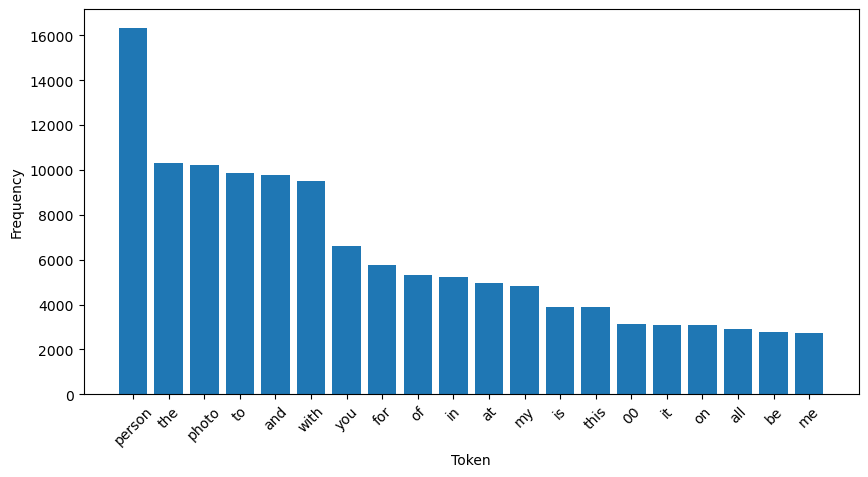

In [31]:
def top_n_tokens(X, cv, N, plot=True):
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    top_words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:N]

    if plot:
        plt.figure(figsize=(10, 5))
        plt.bar([w[0] for w in top_words_freq], [w[1] for w in top_words_freq])
        plt.xticks(rotation=45)
        plt.xlabel('Token')
        plt.ylabel('Frequency')
        plt.show()
    else:
        return top_words_freq
    
top_n_tokens(
    X= X_train0, 
    cv= vectorizer, 
    N=20
)


## Question 3

- Build one or more classifiers. 
- Report the accuracy score for vectorized train and test data.
- Print a classification report for model performance on vectorized test data

In [32]:
# Making a KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)

# Fitting and predicting https://www.projectpro.io/recipes/generate-classification-report-and-confusion-matrix-in-python
y_pred = knn.fit(X_train0, y_train).predict(X_test0)


In [33]:
# Making a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.18      0.32      0.23       565
anticipation       0.48      0.58      0.52      3730
        fear       0.09      0.10      0.10       114
         joy       0.48      0.46      0.47      3683
     sadness       0.57      0.11      0.19      1225

    accuracy                           0.45      9317
   macro avg       0.36      0.31      0.30      9317
weighted avg       0.47      0.45      0.44      9317



## Question 4
In the above model(s), we used unigrams (single words) only. This is the default for count_vectorizer. 

- Try with unigrams and bigrams, and also unigrams, bigrams and trigrams.  
You do this by setting ngram_range for `CountVectorizer`. 

- Build a logistic regression model for each of these settings and report on the results.

In [18]:
# CAN BE BUILD IN MANY WAYS, BUT CONSIDER THE OUTPUT BELOW AS INSPIRATION

Running n-grams: (1, 1)
Running n-grams: (1, 2)
Running n-grams: (1, 3)
Running n-grams: (2, 3)


,ngrams,vocabulary_size,LogisticRegression_train,LogisticRegression_test,SGDClassifier_train,SGDClassifier_test,mean_train
2,"(1, 3)",331933,0.995,0.567,0.992,0.538,0.994
1,"(1, 2)",144976,0.993,0.563,0.993,0.539,0.993
3,"(2, 3)",308858,0.991,0.512,0.992,0.489,0.992
0,"(1, 1)",23075,0.939,0.541,0.973,0.515,0.956


<h2>Question 5</h2>

- Use dummy classifier with the default settings (most frequent class), and the uniform strategy (random guessing). 

- Select the `CountVectorizer` with the optimal `nram_range`. Use the vectorized version of the data from this model.
- Print the train and test results for each dummy classifier, to determine some baselines for comparison.

In [34]:
# Making a dummy classifier model
dummy_clf_M = DummyClassifier(strategy="most_frequent")

# Fitting and predicting the model for most frequent
y_pred_M = dummy_clf_M.fit(X_train, y_train).predict(X_test)

# Printing scores
print("Accuracy on training set: {:.3f}".format(dummy_clf_M.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dummy_clf_M.score(X_test, y_test)))

Accuracy on training set: 0.405
Accuracy on test set: 0.400


In [35]:
# Making a dummy classifier model
dummy_clf_U = DummyClassifier(strategy="uniform")

# Fitting and predicting the model for uniform
y_pred_U = dummy_clf_U.fit(X_train, y_train).predict(X_test)

# Printing scores
print("Accuracy on training set: {:.3f}".format(dummy_clf_U.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dummy_clf_U.score(X_test, y_test)))

Accuracy on training set: 0.199
Accuracy on test set: 0.198


In [37]:
# Trying n_gram ranges Using the count vectorizer https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
vectorizer1 = CountVectorizer(ngram_range=(1,2))
 
#Fitting on the X_train data
vectorizer1.fit(X_train)

#Transforming both the training and test data
X_train1 = vectorizer.transform(X_train)
X_test1 = vectorizer.transform(X_test)

# Applying to the knn model made earlier and making a classification report
y_pred = knn.predict(X_test1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.18      0.32      0.23       565
anticipation       0.48      0.58      0.52      3730
        fear       0.09      0.10      0.10       114
         joy       0.48      0.46      0.47      3683
     sadness       0.57      0.11      0.19      1225

    accuracy                           0.45      9317
   macro avg       0.36      0.31      0.30      9317
weighted avg       0.47      0.45      0.44      9317



In [38]:
# Trying n_gram ranges Using the count vectorizer https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
vectorizer2 = CountVectorizer(ngram_range=(1,3))
 
#Fitting on the X_train data
vectorizer2.fit(X_train)

#Transforming both the training and test data
X_train2 = vectorizer.transform(X_train)
X_test2 = vectorizer.transform(X_test)

# Applying to the knn model made earlier and making a classification report
y_pred = knn.predict(X_test2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.18      0.32      0.23       565
anticipation       0.48      0.58      0.52      3730
        fear       0.09      0.10      0.10       114
         joy       0.48      0.46      0.47      3683
     sadness       0.57      0.11      0.19      1225

    accuracy                           0.45      9317
   macro avg       0.36      0.31      0.30      9317
weighted avg       0.47      0.45      0.44      9317



In [40]:
# Trying n_gram ranges Using the count vectorizer https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
vectorizer3 = CountVectorizer(ngram_range=(1,4))
 
#Fitting on the X_train data
vectorizer3.fit(X_train)

#Transforming both the training and test data
X_train3 = vectorizer.transform(X_train)
X_test3 = vectorizer.transform(X_test)

# Applying to the knn model made earlier and making a classification report
y_pred = knn.predict(X_test3)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.18      0.32      0.23       565
anticipation       0.48      0.58      0.52      3730
        fear       0.09      0.10      0.10       114
         joy       0.48      0.46      0.47      3683
     sadness       0.57      0.11      0.19      1225

    accuracy                           0.45      9317
   macro avg       0.36      0.31      0.30      9317
weighted avg       0.47      0.45      0.44      9317



Different ngram_ranges have been tried out but the result does not seem to change? Not sure if i am doing things correctly?

## Question 6

- Use the `TfidfTransformer`, to create Term Frequency - Inverse Document Frequency (tfidf) scores instead of frequency scores. 
- You can apply the `TfidfTransformer` on the vectors created by `CountVectorizer`, using the fit_transform method just as is done with `CountVectorizer`. 
- Create a logistic regression model with the data produced by `TfidfTransformer`, and report the scores on train and test.

- **TIP**: Instead of calculating frequencies with `CountVectorizer` and *then* calculating TF-IDF scores from said frequencies, you can import and call `TfidfVectorizer` directly, with the same syntax as you used for `CountVectorizer`

In [53]:
# A lot of inspiration from here: https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.Y_y69l6ZO3A
# instantiate CountVectorizer() 
cv=CountVectorizer() 
# this steps generates word counts for the words in your docs 
word_count_vector_train=cv.fit_transform(X_train)

# Seeing the result
word_count_vector_train.shape

(18914, 33109)

In [54]:
# Calling the tfidf
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 

# Fitting the model. Not sure whether to fit and or transform the test data?
tfidf_transformer.fit(word_count_vector_train)
#tfidf_transformer.transform(word_count_vector_test)

# Preparing for showing the results
X_train_df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 

# sort ascending 
X_train_df_idf.sort_values(by=['idf_weights'])

c:\Users\lynma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,idf_weights
photo,1.628510
with,1.769417
person,1.772159
and,2.011627
to,2.024357
...,...
iamwill,10.154563
iamphosphene,10.154563
iamnru,10.154563
iammandaue,10.154563


In [55]:
# Not sure what actually goes wrong here
# Instantiating logistic regression and fitting on the tfidf data
lr = LogisticRegression().fit(X_train_df_idf, y_train)

# Predictiting
# Printing scores
print("Accuracy on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test, y_test)))

ValueError: Found input variables with inconsistent numbers of samples: [33109, 18914]

In [60]:
# Using the TfidfVectorizer
TVec = TfidfVectorizer()

#Fitting the vector data on X_Train
X_trainTVec = TVec.fit(X_train)


#Transforming both the training and test data
X_trainTV = vectorizer.transform(X_train)
X_testTV = vectorizer.transform(X_test)

# Logistic regression model with Fitting on the X_train data
lrTV =LogisticRegression(random_state=42, max_iter=10000).fit(X_trainTV, y_train)

# Applying to the knn model made earlier and making a classification report
y_pred = lrTV.predict(X_testTV)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.54      0.38      0.45       565
anticipation       0.59      0.62      0.61      3730
        fear       0.48      0.09      0.15       114
         joy       0.56      0.60      0.58      3683
     sadness       0.61      0.48      0.54      1225

    accuracy                           0.58      9317
   macro avg       0.55      0.44      0.46      9317
weighted avg       0.58      0.58      0.57      9317



<h2>Question 7</h2>


- Create a Scikit-Learn `Pipeline`, consisting of `CountVectorizer`, `TfidfTransformer`, and `LogisticRegression`. 

- Apply the pipeline to the training data, just as in the previous question, and report results on train and test.

In [61]:
# Using Pipeline https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
# Inspiration from here as well: https://medium.com/@soohyunniekimm/logistic-regression-with-columntransformer-pipeline-and-gridsearchcv-d2e3a781422f
# Defining pipe
pipe = Pipeline(steps=[
    ('CountVectorizer',CountVectorizer()),
    ('TfidfTransformer',TfidfTransformer()),
    ('Model', LogisticRegression(max_iter=10000))
])

# Fitting the pipeline with the data
pipe.fit(X_train, y_train)

# Printing the score
pipe.score(X_test,y_test)

0.5920360631104433

In [62]:
# Printing scores
print("Accuracy on training set: {:.3f}".format(pipe.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(pipe.score(X_test, y_test)))

Accuracy on training set: 0.774
Accuracy on test set: 0.592


<h2>Question 8</h2>

- Use the above pipeline with GridSearchCV. 

**Hint** You can use the following choices for parameters: 
- for CountVectorizer, use ngram ranges of (1,1), (1,2), and (1,3). 
- For TfidfTransformer set the *use_idf* parameter to `True` or `False`. Print the best score and best parameter choices.

In [66]:
# Pipeline together with gridsearchCV: https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
# Defining parameters for the param grid
params = {
    'CountVectorizer__ngram_range':[(1,1),(1,2),(1,3)],
    'TfidfTransformer__use_idf':[True,False]
}

search = GridSearchCV(
    pipe,
    param_grid=params,
    cv=2
)

# Fitting the grid search
search.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(search.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(search.score(X_test, y_test)))
print("Best params: ", search.best_params_) # Printing the best params

Accuracy on training set: 0.854
Accuracy on test set: 0.592
Best params:  {'CountVectorizer__ngram_range': (1, 2), 'TfidfTransformer__use_idf': True}


<h2>Question 9</h2>
Use classification report with the best model resulting from grid_search in the previous two questions.

In [67]:
# Making a new pipeline, with the suggested optimal params
pipe1 = Pipeline(steps=[
    ('CountVectorizer',CountVectorizer(ngram_range=(1,2))),
    ('TfidfTransformer',TfidfTransformer(use_idf=True)),
    ('Model', LogisticRegression(max_iter=10000))
])

# Fitting the pipeline with the data
pipe1.fit(X_train, y_train)

# Predicting with the optimal params
y_pipePred = pipe1.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pipePred))


              precision    recall  f1-score   support

       anger       0.76      0.20      0.32       565
anticipation       0.59      0.69      0.64      3730
        fear       0.00      0.00      0.00       114
         joy       0.57      0.63      0.60      3683
     sadness       0.68      0.41      0.51      1225

    accuracy                           0.59      9317
   macro avg       0.52      0.39      0.41      9317
weighted avg       0.60      0.59      0.58      9317



c:\Users\lynma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lynma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lynma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Interesting that anger gets high precision score, but so low recall score. On the other hand anticipation seems to have the highest F1 score.

## Bonus: Question 10
Let's go back to question 1 and convert the problem to a binary classification problem. 

- Map ("joy", "anticipation") to "positive" and ("anger", "fear", "sadness") to "negative" (Use the snippet below)

- Then copy/paste the experiments above here, and run them again with this new scope. 
- Report what your new baseline is and comment on the effect of changing the scope.

In [ ]:
df["emotion"] = df["emotion"].replace(
    {
        "joy": "positive",
        "anticipation": "positive",
        "anger": "negative",
        "fear": "negative",
        "sadness": "negative"
    }
)